# Problem Statement

In this dataset we need to predict the price for the used cars based on the features given 

# Import libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from itertools import product

In [2]:
df1= pd.read_excel('D2_file1.xlsx')
df2= pd.read_excel('D2_file2.xlsx')
df3= pd.read_excel('D2_file3.xlsx')
df4= pd.read_excel('D2_target.xlsx')

In [3]:
#printing the shape of each dataset 
print("Shape of the df1 :",df1.shape)
print("Shape of the df2 :",df2.shape)
print("Shape of the df3 :",df3.shape)
print("Shape of the df4 :",df4.shape)


Shape of the df1 : (2059, 10)
Shape of the df2 : (2059, 4)
Shape of the df3 : (2059, 8)
Shape of the df4 : (2059, 2)


In [4]:
print("--------------------Dataset for OLD CAR PRICE PREDICTION in India------------------------")
print("\n")
print("\t\t---------Data of D2_file1 ---------")
print("\n")
print(df1.head(3))
print("\n")
print("\t\t---------Data of D2_file2 ---------")
print("\n")
print(df2.head(3))
print("\n")
print("\t\t---------Data of D2_file3---------")
print("\n")
print(df3.head(3))
print("\n")
print("\t\t---------Data of D2_target---------")
print("\n")
print(df4.head(3))
print("\n")
print("--------------------End of Dataset for Air Quality in India------------------------")

--------------------Dataset for OLD CAR PRICE PREDICTION in India------------------------


		---------Data of D2_file1 ---------


   id   Engine          Max Power              Max Torque Drivetrain  Length  \
0   1  1198 cc  87 bhp @ 6000 rpm       109 Nm @ 4500 rpm        FWD  3990.0   
1   2  1248 cc  74 bhp @ 4000 rpm       190 Nm @ 2000 rpm        FWD  3995.0   
2   3  1197 cc  79 bhp @ 6000 rpm  112.7619 Nm @ 4000 rpm        FWD  3585.0   

    Width  Height  Seating Capacity  Fuel Tank Capacity  
0  1680.0  1505.0               5.0                35.0  
1  1695.0  1555.0               5.0                42.0  
2  1595.0  1550.0               5.0                35.0  


		---------Data of D2_file2 ---------


   id           Make                 Model  Year
0   1          Honda   Amaze 1.2 VX i-VTEC  2017
1   2  Maruti Suzuki       Swift DZire VDI  2014
2   3        Hyundai  i10 Magna 1.2 Kappa2  2011


		---------Data of D2_file3---------


   id  Kilometer Fuel Type Transmiss

In [5]:
print("--------------------Information of Dataset for OLD CAR PRICE PREDICTION------------------------")
print("\n")
print("\t\t---------Info of D2_file1 Data---------")
print("\n")
print(df1.info())
print("\n")
print("\t\t---------Info of D2_file2 Data---------")
print("\n")
print(df2.info())
print("\n")
print("\t\t---------Info of D2_file3 Data---------")
print("\n")
print(df3.info())
print("\n")
print("\t\t---------Info of D2_target Data---------")
print("\n")
print(df4.info())
print("\n")
print("--------------------End of Dataset for Air Quality in India------------------------")

--------------------Information of Dataset for OLD CAR PRICE PREDICTION------------------------


		---------Info of D2_file1 Data---------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2059 non-null   int64  
 1   Engine              1979 non-null   object 
 2   Max Power           1979 non-null   object 
 3   Max Torque          1979 non-null   object 
 4   Drivetrain          1923 non-null   object 
 5   Length              1995 non-null   float64
 6   Width               1995 non-null   float64
 7   Height              1995 non-null   float64
 8   Seating Capacity    1995 non-null   float64
 9   Fuel Tank Capacity  1946 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 161.0+ KB
None


		---------Info of D2_file2 Data---------


<class 'pandas.core.frame.DataFrame'>
RangeIndex

Here we can observe that in all the datasets we have (ID) column as common so based on that we will merge our datasets into single dataset 

In [6]:
# merging the datasets to one single dataset
df = pd.merge(df1,df2, on=['id']).merge(df3, on=['id']).merge(df4, on=['id'])

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Make,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Price
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,Honda,Amaze 1.2 VX i-VTEC,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,505000
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,Maruti Suzuki,Swift DZire VDI,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,450000
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,Hyundai,i10 Magna 1.2 Kappa2,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,220000
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,Toyota,Glanza G,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,799000
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,Toyota,Innova 2.4 VX 7 STR [2016-2020],2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,1950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2055,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0,Mahindra,XUV500 W8 [2015-2017],2016,90300,Diesel,Manual,Surat,White,First,Individual,850000
2055,2056,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0,Hyundai,Eon D-Lite +,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,275000
2056,2057,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0,Ford,Figo Duratec Petrol ZXI 1.2,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,240000
2057,2058,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0,BMW,5-Series 520d Luxury Line [2017-2019],2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,4290000


In [9]:
df = df.drop(['id','Year'],axis=1)

<AxesSubplot:>

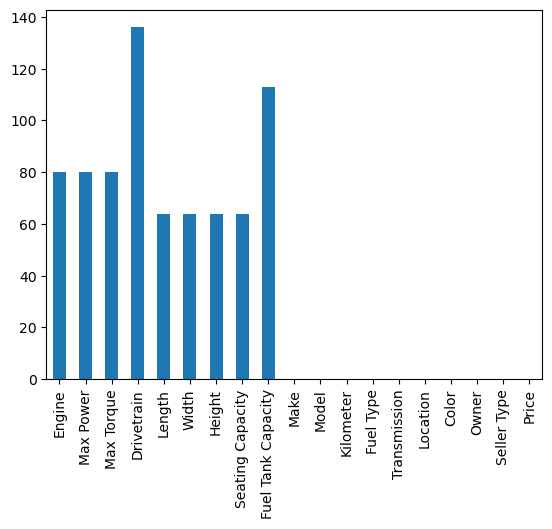

In [10]:
df.isnull().sum().plot(kind ='bar')


In [11]:
for c in df.columns:
    null_values = df[c].isna().sum()
    percentage = (null_values / len(df)) * 100
    print("In {}, mean of null value is: {}".format(c, percentage))

In Engine, mean of null value is: 3.885381253035454
In Max Power, mean of null value is: 3.885381253035454
In Max Torque, mean of null value is: 3.885381253035454
In Drivetrain, mean of null value is: 6.605148130160273
In Length, mean of null value is: 3.108305002428363
In Width, mean of null value is: 3.108305002428363
In Height, mean of null value is: 3.108305002428363
In Seating Capacity, mean of null value is: 3.108305002428363
In Fuel Tank Capacity, mean of null value is: 5.488101019912579
In Make, mean of null value is: 0.0
In Model, mean of null value is: 0.0
In Kilometer, mean of null value is: 0.0
In Fuel Type, mean of null value is: 0.0
In Transmission, mean of null value is: 0.0
In Location, mean of null value is: 0.0
In Color, mean of null value is: 0.0
In Owner, mean of null value is: 0.0
In Seller Type, mean of null value is: 0.0
In Price, mean of null value is: 0.0


In [12]:
df.describe()

,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Kilometer,Price
count,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000,2.059000e+03,2.059000e+03
mean,4280.860652,1767.991980,1591.735338,5.306266,52.002210,5.422471e+04,1.702992e+06
std,442.458507,135.265825,136.073956,0.822170,15.110198,5.736172e+04,2.419881e+06
min,3099.000000,1475.000000,1165.000000,2.000000,15.000000,0.000000e+00,4.900000e+04
25%,3985.000000,1695.000000,1485.000000,5.000000,41.250000,2.900000e+04,4.849990e+05
50%,4370.000000,1770.000000,1545.000000,5.000000,50.000000,5.000000e+04,8.250000e+05
75%,4629.000000,1831.500000,1675.000000,5.000000,60.000000,7.200000e+04,1.925000e+06
max,5569.000000,2220.000000,1995.000000,8.000000,105.000000,2.000000e+06,3.500000e+07


In [13]:
df.dtypes

Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
Make                   object
Model                  object
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Price                   int64
dtype: object

In [14]:
''' filling null values with mean of each column '''
for c in df.columns:
    if df[c].isna().sum() > 0:
        if df[c].dtype == 'float64':
            df[c] = df[c].fillna(df[c].mean())
        elif df[c].dtype == 'object':
            df[c] = df[c].fillna(df[c].value_counts().index[0])

Here im filling the null values in numerical columns with mean() & categorical columns with mode()

In [15]:
df.isna().sum()

Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Make                  0
Model                 0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Price                 0
dtype: int64

In [16]:
df['Engine'].value_counts()

1197 cc    311
1248 cc    122
998 cc     121
1497 cc     84
1968 cc     82
          ... 
1948 cc      1
4806 cc      1
3496 cc      1
2609 cc      1
995 cc       1
Name: Engine, Length: 108, dtype: int64

In [17]:
df['Max Power'].value_counts()

89 bhp @ 4000 rpm     170
82 bhp @ 6000 rpm      62
83 bhp @ 6000 rpm      55
126 bhp @ 4000 rpm     55
74 bhp @ 4000 rpm      50
                     ... 
204 bhp @ 3800 rpm      1
157 bhp @ 6500 rpm      1
255 bhp @ 3600 rpm      1
76 bhp @ 6000 rpm       1
329 bhp @ 5250 rpm      1
Name: Max Power, Length: 335, dtype: int64

In [18]:
df.nunique()

Engine                 108
Max Power              335
Max Torque             290
Drivetrain               3
Length                 249
Width                  171
Height                 197
Seating Capacity         7
Fuel Tank Capacity      56
Make                    33
Model                 1050
Kilometer              847
Fuel Type                9
Transmission             2
Location                77
Color                   17
Owner                    6
Seller Type              3
Price                  619
dtype: int64

In [19]:
df[['power', 'power_rpm']] = df['Max Power'].str.split('@', expand=True)
df[['torque', 'torque_rpm']] = df['Max Torque'].str.split('@', expand=True)

Here we are splitting the df['Max Power']& df['Max Torque'] columns  with @ symbol  

In [20]:
df['power'] = df['power'].str.replace('bhp', '').astype(float)
df['torque'] = df['torque'].str.replace('Nm', '').astype(float)

In [21]:
df.drop(['Max Power', 'Max Torque'], axis=1, inplace=True)
df.drop(['power_rpm', 'torque_rpm'], axis=1, inplace=True)

In [22]:
df['Engine'] = df['Engine'].str.replace('cc', '').astype(float)

In [23]:
df['Model'].value_counts()

X1 sDrive20d xLine                 15
Swift DZire VDI                    14
City V                             13
Fortuner 2.8 4x2 AT [2016-2020]    13
Swift DZire VXI                    12
                                   ..
XF R 5.0 V8 Supercharged            1
Pajero SFX 2.8                      1
Etios G                             1
Marazzo M6 Plus 8 STR               1
Figo Duratec Petrol ZXI 1.2         1
Name: Model, Length: 1050, dtype: int64

In [24]:
df.drop('Model',axis=1, inplace=True)

In [25]:
df.sample(3)

,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Make,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Price,power,torque
878,1199.0,FWD,3955.0,1694.0,1544.0,5.0,40.0,Honda,80000,Petrol,Automatic,Delhi,Grey,First,Individual,595000,89.0,110.0
1456,2997.0,AWD,4804.0,2141.0,1796.0,5.0,70.0,Mercedes-Benz,60513,Diesel,Automatic,Mumbai,Silver,First,Corporate,3200000,254.0,619.0
1092,2487.0,FWD,4975.0,1865.0,1445.0,5.0,50.0,Lexus,27000,Hybrid,Automatic,Mumbai,Blue,First,Individual,4800000,176.0,221.0


In [26]:
df.dtypes

Engine                float64
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
Make                   object
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Price                   int64
power                 float64
torque                float64
dtype: object

In [27]:
## for catagorical columns
cat_cols=df.select_dtypes(include=['object']).columns
cat_cols

Index(['Drivetrain', 'Make', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type'],
      dtype='object')

In [28]:
## for num_columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['Engine', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Kilometer', 'Price', 'power', 'torque'],
      dtype='object')

In [29]:
cat = df[cat_cols]
num = df[num_cols]
print(cat.shape)
print(num.shape)

(2059, 8)
(2059, 10)


### Converting categorical columns to numerical columns

In [30]:
cat['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric', 'CNG + CNG',
       'Hybrid', 'Petrol + CNG', 'Petrol + LPG'], dtype=object)

In [31]:
cat.loc[cat['Fuel Type'] == 'CNG + CNG'] = 'CNG'
cat.loc[cat['Fuel Type'] == 'Petrol + CNG'] = 'Hybrid'
cat.loc[cat['Fuel Type'] == 'Petrol + LPG'] = 'Hybrid'

In [32]:
cat['Transmission'].value_counts()

Manual       1130
Automatic     926
Hybrid          2
CNG             1
Name: Transmission, dtype: int64

In [33]:
cat.loc[cat['Transmission'] == 'CNG'] = 'Hybrid'

In [34]:
cat= pd.get_dummies(cat, columns=['Fuel Type'], drop_first=True)
cat= pd.get_dummies(cat, columns=['Drivetrain'], drop_first=True)
cat= pd.get_dummies(cat, columns=['Make'], drop_first=True)
cat= pd.get_dummies(cat, columns=['Transmission'], drop_first=True)
cat= pd.get_dummies(cat, columns=['Color'], drop_first=True)

In [35]:
cat = cat.replace({'Owner':{'First':0,'Second':1,'Third':2,'Fourth':3,'Hybrid':4,'4 or More':5,'UnRegistered Car':6}})

In [36]:
cat= pd.get_dummies(cat, columns=['Seller Type'], drop_first=True)

In [37]:
new = pd.concat([num,cat],axis=1)

In [38]:
new.dtypes

Engine                    float64
Length                    float64
Width                     float64
Height                    float64
Seating Capacity          float64
                           ...   
Color_White                 uint8
Color_Yellow                uint8
Seller Type_Corporate       uint8
Seller Type_Hybrid          uint8
Seller Type_Individual      uint8
Length: 75, dtype: object

In [39]:
new.drop('Location',axis=1,inplace=True)

In [40]:
new.isna().sum()

Engine                    0
Length                    0
Width                     0
Height                    0
Seating Capacity          0
                         ..
Color_White               0
Color_Yellow              0
Seller Type_Corporate     0
Seller Type_Hybrid        0
Seller Type_Individual    0
Length: 74, dtype: int64

In [41]:
new.shape

(2059, 74)

## Splitting the data into train and test split

In [42]:
def train_test_split(Data, test_ratio):
    
    Data=Data.sample(frac=1,random_state=42)

    samples=int(len(Data)*(1-test_ratio))

    train_data=Data[:samples]
    test_data=Data[samples:]

    return train_data, test_data

In [44]:
train_data, test_data = train_test_split(new, 0.3)

In [45]:
X_train,Y_train=train_data.loc[:,train_data.columns != 'Price'].values, train_data.loc[:,'Price'].values.reshape(-1,1)
X_test,Y_test=test_data.loc[:,test_data.columns != 'Price'].values, test_data.loc[:,'Price'].values.reshape(-1,1)

In [46]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
reg= DecisionTreeRegressor()
reg.fit(X_train,Y_train)

DecisionTreeRegressor()

In [48]:
y_pred = reg.predict(X_test)

In [50]:
r2_score(Y_test, y_pred)

0.7400340724480012

In [52]:
y_train_pred = reg.predict(X_train)
r2_score(Y_train, y_train_pred)

0.9996986022497578

In [53]:
from sklearn import  metrics
print('MAE',metrics.mean_absolute_error(Y_test,y_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE 497086.5760517799
MSE 1514298089521.1458
RMSE 1230568.1978342955


# Hyper Parameter tuning

In [55]:
# Hyper parameters range intialization for tuning 

parameters={'max_depth': [None, 1, 2, 3, 4,9,10,25,100], 
             'min_samples_split': [2, 3, 4, 5],
             'min_samples_leaf': [1, 2, 3]}

In [56]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [58]:
tuning_model=GridSearchCV(reg,param_grid=parameters,scoring='neg_mean_squared_error',cv=3)

In [59]:
tuning_model.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 9, 10, 25, 100],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [60]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [61]:
# best model score
tuning_model.best_score_

-1956335506278.5156

# Training Decision Tree With Best Hyperparameter

In [63]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=100, min_samples_leaf=1, min_samples_split=2)

In [64]:
# fitting model


tuned_hyper_model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=100)

In [65]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)

In [66]:
# with hyperparameter tuning 
print('MAE:', metrics.mean_absolute_error(Y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(Y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, tuned_pred)))

MAE: 501714.41747572814
MSE: 1250112464035.712
RMSE: 1118084.2830644352


In [67]:
# without Hyper parameter tuning
print('MAE',metrics.mean_absolute_error(Y_test,y_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE 497086.5760517799
MSE 1514298089521.1458
RMSE 1230568.1978342955


In [68]:
r2_score(Y_test, y_pred)

0.7400340724480012

In [69]:
r2_score(Y_test, tuned_pred)

0.7853879308794964